In [1]:
import sys
sys.path.append('..')

import numpy as np
import os
import torch
import train_helpers

from dataset import TARGET_LABEL_NAMES

os.environ['CUDA_VISIBLE_DEVICES'] = "6"
os.environ['CUDA_DEVICE_ORDER'] = "PCI_BUS_ID"

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
state = torch.load('../log_squeezenet/checkpoint.best.pth.tar')

In [3]:
state.keys()

dict_keys(['epoch', 'best_loss', 'best_metrics', 'val_metrics_history', 'train_metrics_history', 'model', 'model_state_dict', 'optimizer', 'optimizer_state_dict'])

<Figure size 576x504 with 0 Axes>

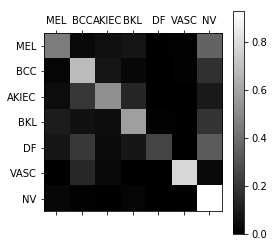

In [14]:
confusion_matrix = state['val_metrics_history'][state['epoch'] - 1]['confusion_matrix']
confusion_matrix = confusion_matrix / np.sum(confusion_matrix, axis=1, keepdims=True)

plt.figure(figsize=(8, 7));
plt.matshow(confusion_matrix, cmap='gray');
plt.xticks(range(len(TARGET_LABEL_NAMES)), TARGET_LABEL_NAMES);
plt.yticks(range(len(TARGET_LABEL_NAMES)), TARGET_LABEL_NAMES);
plt.colorbar();

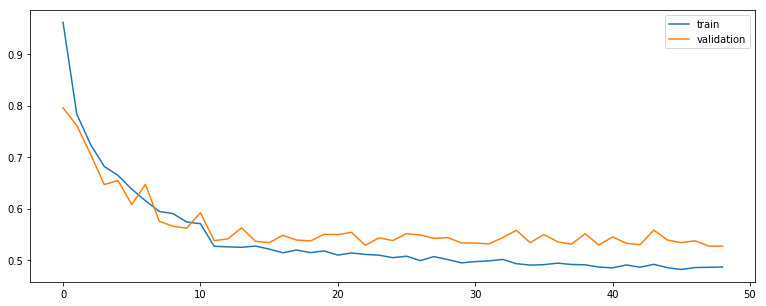

In [15]:
plt.figure(figsize=(13, 5))
plt.plot([metrics['loss'] for metrics in state['train_metrics_history']], label='train')
plt.plot([metrics['loss'] for metrics in state['val_metrics_history']], label='validation')
plt.legend();